### Forecasting models

#### Naive method
we simply set all forecasts to be the value of the last observation <br>
$\hat{y}_{T+h | T}$  = ${y}_{T}$

#### Seasonal Naive method
In this case, we set each forecast to be equal to the last observed value from the same season of the year (e.g., the same month of the previous year).
<br>
Formally, the forecast for time T+h is written as
<br>
$\hat{y}_{T+h | T}$  = ${y}_{T+h-m(k+1)}$
<br>
* m: seasonal period<br>
* k is integer part of (h-1)/m

Put Simply, 
- For example, with monthly data, the forecast for all future February values is equal to the last observed February value.
- With quarterly data, the forecast of all future Q2 values is equal to the last observed Q2 value

#### Simple average method
The forecasts of all future values are equal to the average (or “mean”) of the historical data. <br>
If we let the historical data be denoted ${y}_{1}$, ${y}_{2}$,${y}_{3}$,..${y}_{T}$, then we can write the forecasts as
<br>
$\hat{y}_{T+h | T}$ = $\bar{y}$ = (${y}_{1}$ + ${y}_{2}$ + ${y}_{3}$ + ..${y}_{T}$)/T

The notation $\hat{y}_{T+h | T}$ is a short-hand for the estimate of ${y}_{T+h}$ based on the data  
${y}_{1}$, ${y}_{2}$,${y}_{3}$,..${y}_{T}$

#### Drift Method
A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. <br>
Thus the forecast for time  T+h is given by 
<br>
$\hat{y}_{T+h | T}$  = ${y}_{T}$ + h (${y}_{T}$ - ${y}_{1}$ / T -1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')

In [6]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

In [7]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
### Split data into train , test
train =  df[0:120]
test  =  df[120:]

### Implementation

#### Naive method implementation

In [21]:
# we want to predict for test data,so initialize y_hat_naive as test data
y_hat_naive = test.copy()

# set all values of y_hat_naive as last value of train data 
y_hat_naive['naive_forecast'] = train.iloc[-1][0]

In [24]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-01-01,360,337
1959-02-01,342,337
1959-03-01,406,337
1959-04-01,396,337
1959-05-01,420,337


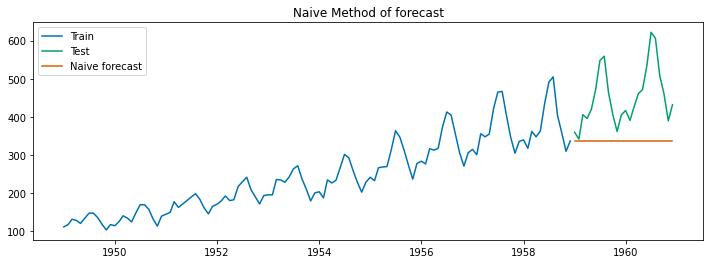

In [23]:
fig, ax = plt.subplots(figsize = (12, 4))

plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')

plt.legend(loc='best')
plt.title('Naive Method of forecast')

plt.show()

In [27]:
# Calculate RMSE and MAPE to evaluate forecast
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_naive.naive_forecast)).round(2)
mape = np.round(np.mean(np.abs(test.Passengers - y_hat_naive.naive_forecast)/test.Passengers)* 100, 2)

print(f"RMSE: {rmse}, MAPE:{mape}")

RMSE: 137.51, MAPE:23.63


#### Simple average method implementation

In [29]:
y_hat_avg = test.copy()

y_hat_avg['average_forecast'] = np.mean(train.Passengers)


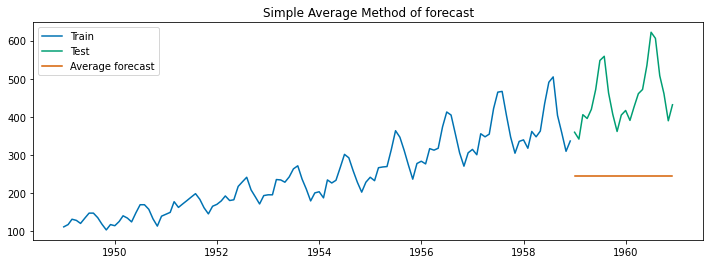

In [30]:
fig, ax = plt.subplots(figsize = (12, 4))

plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_avg['average_forecast'], label='Average forecast')

plt.legend(loc='best')
plt.title('Simple Average Method of forecast')

plt.show()

In [31]:
# Error measure

rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_avg.average_forecast)).round(2)
mape = np.round(np.mean(np.abs(test.Passengers - y_hat_avg.average_forecast)/test.Passengers)* 100, 2)

print(f"RMSE: {rmse}, MAPE:{mape}")


RMSE: 219.69, MAPE:44.28
